# Métodos para encontrar raízes #


Neste Notebook, vamos implementar os métodos de encotrar raízes vistos nas últimas aulas. Além disto, faremos experimentos para medir a __quanto tempo__ cada método está levando com a biblioteca timeit


Para começar, reaproveite seu método da bissecção e o adicione abaixo. Implemente também o método das secantes: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def bisseccao(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ant = 0
    i = 0
    for i in range(niter):
        m = (a+b)/2
        fm = f(m)
        fb = f(b)
        if (np.abs(fm) <= minimo) or (np.abs(fm-ant) <= proximidadeIter):
            break
        elif fb*fm > 0:
            b = m
        else:
            a = m
        ant = fm
    return m, i

def secantes(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ant = 0
    i = 0
    for i in range(niter):
        fb = f(b)
        raiz = b - fb*(b-a)/(fb - f(a))
        fr = f(raiz)
        if (np.abs(fr) <= minimo) or (np.abs(fr-ant) <= proximidadeIter):
            break
        a = b
        b = raiz
        ant = fr
    return raiz, i

Para verificar que seu método está funcionando de fato, faça uma versão com gráficos. Faça a bissecção plotar um gráfico com a função, as três primeiras tentativas de raiz e a última. Faça a mesma coisa para o método das secantes, plotando as três primeiras retas geradas e o ponto final. Teste seu método na função $x^{2}sen(2)$ no intervalo de 2.1 a 4.2

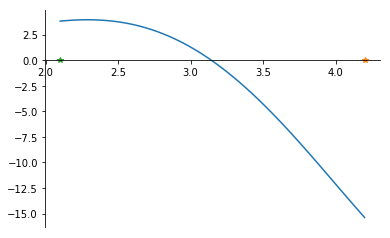

In [74]:
def func(x):
    return x**2*np.sin(x)
def funcd(x):
    return 2*x*np.sin(2) + np.cos(x)*x**2

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')

x = np.linspace(2.1,4.2,100)
plt.plot(x,func(x),4.2,0,'*',2.1,0,'*')

In [48]:
bisseccao(func,2.1,4.2)

(3.1415925979614263, 18)

In [49]:
secantes(func,2.1,4.2)

(3.141592653286708, 7)

In [52]:
def bisseccaog(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ant = 0
    i = 0
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    x = np.linspace(a,b,1000)
    plt.plot(x,f(x))
    for i in range(niter):
        m = (a+b)/2
        fm = f(m)
        fb = f(b)
        if (i < 3):
            plt.plot(m,0,'r*')
        if (np.abs(fm) < 0.000001) or (np.abs(fm-ant) <= proximidadeIter):
            break
        elif fb*fm > 0:
            b = m
        else:
            a = m
        ant = fm
    plt.plot(m,0,'g*')
    plt.show()
    return m, i

def secantesg(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    x = np.linspace(a,b,1000)
    plt.plot(x,f(x))
    ant = 0
    i = 0
    for i in range(niter):
        fb = f(b)
        raiz = b - fb*(b-a)/(fb - f(a))
        fr = f(raiz)
        if (i < 3):
            plt.plot([a,b],[f(a),fb],'r')
        if (np.abs(fr) <= minimo) or (np.abs(fr-ant) <= proximidadeIter):
            break
        a = b
        b = raiz
        ant = fr
    plt.plot([a,b],[f(a),f(b)],'g')
    plt.plot(raiz,0,'g*')
    return raiz, i

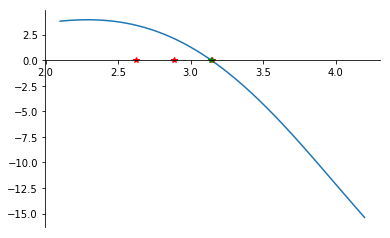

(3.1415925979614263, 18)


In [54]:
print(bisseccaog(func,2.1,4.2))

(3.141592653286708, 7)


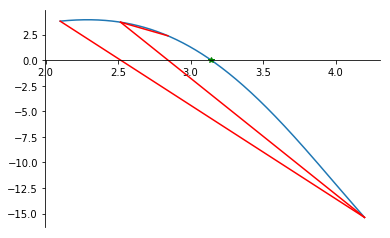

In [53]:
print(secantesg(func,2.1,4.2))

Faça agora o mesmo para o Regula Falsi:

In [75]:
def falsi(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ant = 0
    i = 0
    for i in range(niter):
        fb = f(b)
        raiz = b - fb*(b-a)/(fb - f(a))
        fr = f(raiz)
        if (np.abs(fr) <= minimo) or (np.abs(fr-ant) <= proximidadeIter):
            break
        if fb*fr > 0:
            b = raiz
        else:
            a = raiz
        ant = fr
    return raiz, i

def falsig(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    x = np.linspace(a,b,1000)
    plt.plot(x,f(x))
    ant = 0
    i = 0
    for i in range(niter):
        fb = f(b)
        raiz = b - fb*(b-a)/(fb - f(a))
        fr = f(raiz)
        if (i < 3):
            plt.plot([a,b],[f(a),fb],'r')
        if (np.abs(fr) <= minimo) or (np.abs(fr-ant) <= proximidadeIter):
            break
        if fb*fr > 0:
            b = raiz
        else:
            a = raiz
        ant = fr
    plt.plot([a,b],[f(a),f(b)],'g')
    plt.plot(raiz,0,'g*')
    return raiz, i

### Método de Newton ###

O método de newton é ligeiramente diferente. Ele precisa apenas de um ponto para fazer achar a nova tentativa de raiz, ao invés de um intervalo. Um exemplo gráfico do funcionamento dele:

https://commons.wikimedia.org/wiki/File:NewtonIteration_Ani.gif

Em contrapartida, o método de Newton precisa de um argumento extra: A derivada da função que se deseja achar a a raiz.

Implemente as duas versões do método de newton, com e sem gráficos:

In [118]:
def newton(f,fd,x, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ant = 0
    i = 0
    raiz = x
    fr = f(raiz)
    ant = 0
    while i < niter and (np.abs(fr) > minimo) and (np.abs(fr-ant) > proximidadeIter):
        ant = fr
        raiz = raiz - f(raiz)/fd(raiz)
        fr = f(raiz)
        i += 1
    i-=1
    return raiz,i

def newtong(f,fd,x, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    xs = np.linspace(2.1,4.2,1000)
    plt.plot(xs,f(xs))
    ant = 0
    i = 0
    raiz = x
    fr = f(raiz)
    ant = 0
    while i < niter and (np.abs(fr) > minimo) and (np.abs(fr-ant) > proximidadeIter):
        ant = fr
        x = raiz - f(raiz)/fd(raiz)
        if i < 3:
            plt.plot([raiz,x],[fr,0],'r')
        raiz = x
        fr = f(raiz)
        i += 1
    i-=1
    plt.plot([raiz,x],[fr,0],'r')
    plt.plot(raiz,0,'g*')
    return raiz,i


Teste o método de Newton e o Regula Falsi com a função $x^{2}sen(2)$ no intervalo de 2.1 a 4.2 (escolha qualquer um dos dois pontos para Newton:

In [92]:
falsi(func,2.1,4.2)

(3.1415926038540065, 15)

(3.1415926038540065, 15)


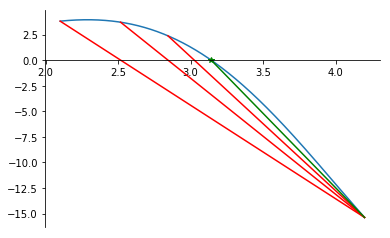

In [93]:
print(falsig(func,2.1,4.2))

In [121]:
newton(func,funcd,b)

(-3.141592702828798, 17)

(-3.141592702828798, 17)

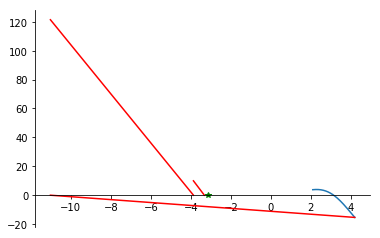

In [122]:
newtong(func,funcd,b)

Com todos os métodos implementados, vamos agora ver qual é o melhor em cada cenário. Para isto, vamos ver, além da raiz gerada e do número de iterações, o tempo levado para encontrar a raiz. Para isto, usaremos a biblioteca timeit

In [3]:
def f(x):
    return x^2

# tudo que começa com % é comando jupyter
# roda 10000000 de vezes a função para o valor 10
%timeit -n10000000 f(10)

90.2 ns ± 5.32 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Como você pode ver, demorou um pouquinho né? Isso porque aquele parametro -n está dizendo para o timeit quantas vezes ele deve rodar o comando f(10), e mostra a média e o desvio padrão de 7 rodadas de 10000000 repetições.


Agora, vamos ao exercício: __você deve encontrar um intervalo onde há uma raiz__ (seja plotando ou usando lagrange), rodar e verificar o tempo de execução, distância da raiz achada de 0 e o número de iterações da bissecção, secantes, regula falsi e Newton para as seguintes funções:

1: $f_1(x) = 2x^4 + 4x^3 + 3x^2-10x-15$

2: $f_2(x) = x^5-2x^4-9x^3+22x^2+4x-24$  

3: $f_3(x) = 5x^3+x^2-e^{1-2x}+cos(x)+20$

4: $f_4(x) = sen(x)x+4$

5: $f_5(x) = (x-3)^5ln(x)$

Entrega: Quinta-Feira, 24/4 via Colabweb